# 1. Preparation:

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('libraries has been imported successfully!')

libraries has been imported successfully!


# 2. CSV Dataset Import:

In [5]:
# data import
df = pd.read_csv("netflix_simplonline_dataset.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 3. Data Exploration (EDA)
# 3.1. Check the structure and data types:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# 3.2. Identify columns with missing values (e.g. director, country, rating):

In [8]:
missing_values = df.isnull().sum()
pct_missing_values = ((missing_values / len(df)) * 100).round(2)

df_missing_values = pd.DataFrame({
    'Number of missing values': missing_values,
    'Percentage of missing values (%)': pct_missing_values
})

df_missing_values

,Number of missing values,Percentage of missing values (%)
show_id,0,0.00
type,0,0.00
title,0,0.00
director,2634,29.91
cast,825,9.37
country,831,9.44
date_added,10,0.11
release_year,0,0.00
rating,4,0.05
duration,3,0.03


# 3.3. Analyze the distributions and frequencies of variables (e.g. movies vs TV shows, genres, countries):

In [9]:
# distribution of types
print('Distribution of types Movies vs TV Shows:')
df['type'].value_counts()

Distribution of types Movies vs TV Shows:


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [10]:
# list of genres
df['listed_in'].unique()


array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [11]:
# distribution of Top 20 genres:
print("Distribution of Top 20 genres:") 
df['listed_in'].value_counts().head(20)

Distribution of Top 20 genres:


listed_in
Dramas, International Movies                         362
Documentaries                                        359
Stand-Up Comedy                                      334
Comedies, Dramas, International Movies               274
Dramas, Independent Movies, International Movies     252
Kids' TV                                             220
Children & Family Movies                             215
Children & Family Movies, Comedies                   201
Documentaries, International Movies                  186
Dramas, International Movies, Romantic Movies        180
Comedies, International Movies                       176
Comedies, International Movies, Romantic Movies      152
Dramas                                               138
Dramas, International Movies, Thrillers              134
Action & Adventure, Dramas, International Movies     132
Action & Adventure                                   128
International TV Shows, TV Dramas                    121
Comedies, Dramas, Ind

In [12]:
# distribution of countries:
print('Distribution of Top 10 countries:')
df['country'].value_counts().head(10)

Distribution of Top 10 countries:


country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

## 3.4. Identify duplicates or obvious anomalies:

In [13]:
header = ["show_id", 
          "type",
          "title",
          "director", 
          "cast", 
          "country", 
          "date_added",	
          "release_year",	
          "rating",
          "duration", 
          "listed_in",	
          "description"]
df_duplicated = df[df.duplicated(subset = header)]
print(f"Number of duplicated rows: {df_duplicated.shape[0]} rows")

Number of duplicated rows: 0 rows


## 3.5. Quickly visualize data to detect patterns (histograms, countplots, boxplots).

### 3.5.1. Countplot for type visualization:

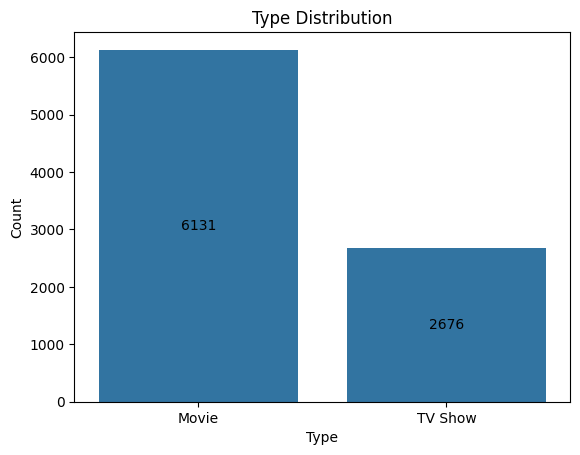

In [14]:
plot = sns.countplot(data = df, x = "type")
plt.title('Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')

for container in plot.containers:
    plot.bar_label(container, label_type="center")
plt.show()

### 3.5.2. Barplot for the distribution of Movies/TV Shows by Country:

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Turkey             105
Nigeria             95
Australia           87
Taiwan              81
Indonesia           79
Name: count, dtype: int64




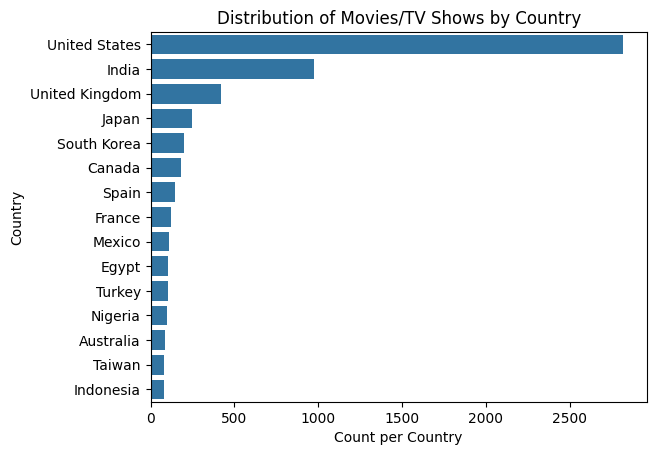

In [15]:
df_3 = df["country"].value_counts().head(15)
print(df_3)
print('\n')

plot_2 = sns.barplot(y=df_3.index, x=df_3.values)
plt.title('Distribution of Movies/TV Shows by Country')
plt.xlabel('Count per Country')
plt.ylabel('Country')
plt.show()

### 3.5.3. Barplot for Movies/TV Shows by release year:

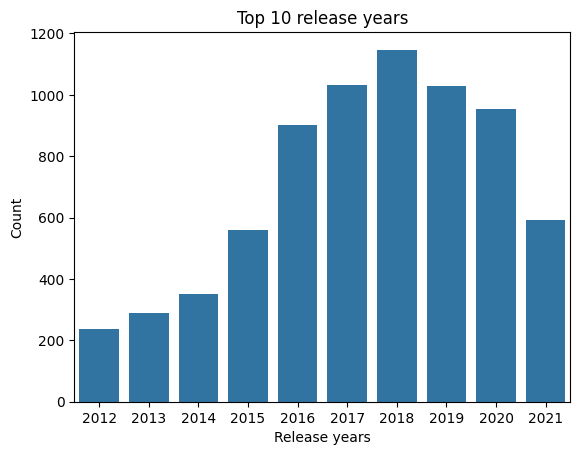

In [16]:
released_year_df = df['release_year'].value_counts().head(10)
plot_3 = sns.barplot(y =released_year_df.values , x= released_year_df.index)
plot_3.set_title("Top 10 release years")
plt.xlabel("Release years")
plt.ylabel("Count")
plt.show()

### 3.5.4. CountPlot for Visualizing the distribution of movies/TV shows by director

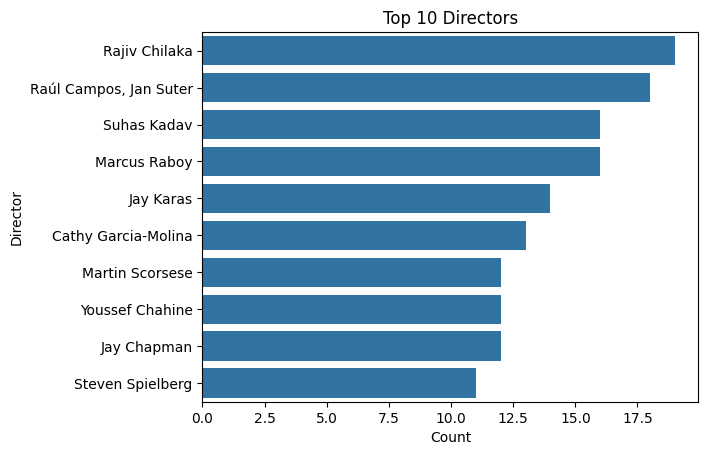

In [17]:
director_count_df = df['director'].value_counts().head(10)
top_10_directors = director_count_df.index
plot_4 = sns.countplot(data = df, y= "director", order = top_10_directors)
plt.title("Top 10 Directors")
plt.xlabel("Count")
plt.ylabel("Director")
plt.show()

# 4. Data preparation and cleaning :

### 4.1. Handling missing values: delete the rows or replace them with "Unknown"/null :

In [18]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [19]:
# 'director' column: ~30% missing -> fill with 'Unknown' (categorical, can't guess the name)
df['director'] = df['director'].fillna('Unknown')

# 'cast' column: ~9% missing -> fill with 'Not Listed' (categorical, same logic as director)
df['cast'].fillna('Not Listed', inplace=True)

# 'country' column: ~9% missing -> fill with 'Unknown' (categorical, country can't be inferred)
df['country'].fillna('Unknown', inplace=True)

# 'date_added' column: only 10 rows missing -> drop them (tiny fraction, safe to remove)
df = df.dropna(subset=['date_added'])

# 'rating' column: only 4 missing -> fill with mode (most frequent value, best for categorical)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# 'duration' column: only 3 missing -> fill with mode (most frequent value, best for categorical)
df['duration'].fillna(df['duration'].mode()[0], inplace=True)

df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Listed,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### 4.2. Droping duplicates 

In [21]:
# since there is no duplicated rows, then we skip droping any row
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### 4.3. Transform multi-value columns (country, listed _in) :

In [22]:
#first split the strings into lists of items
df["country"]   = df["country"].astype(str).str.split(", ")
df['listed_in'] = df["listed_in"].astype(str).str.split(', ')
df['director']  = df["director"].astype(str).str.split(', ')
df['cast']      = df["cast"].astype(str).str.split(', ')

#now explode and clone each row with one single item from that column
df = df.explode("country")
df = df.explode('listed_in')
#df = df.explode("cast")
#df = df.explode('director')

#show the results 
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Not Listed],United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,[Mozez Singh],"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,[Mozez Singh],"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


### 4.4 : Data type changing :

In [23]:
# Convert date_added to datetime (can't be done with astype)
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

# Convert the rest of the columns
df = df.astype({
    'show_id': 'string',
    'type': 'string',
    'title': 'string',
    'director': 'string',
    'cast': 'string',
    'country': 'string',
    'release_year': 'int64',
    'rating': 'string',
    'duration': 'string',
    'listed_in': 'string',
    'description': 'string'
})

print("Data types after conversion:")
df.dtypes

Data types after conversion:


show_id         string[python]
type            string[python]
title           string[python]
director        string[python]
cast            string[python]
country         string[python]
date_added      datetime64[ns]
release_year             int64
rating          string[python]
duration        string[python]
listed_in       string[python]
description     string[python]
dtype: object

### 4.5. Create derived columns: year, month, day and  date added :

In [24]:
df['year_added'] = df["date_added"].dt.year
df['month_added'] = df["date_added"].dt.month_name()
df['day_added'] = df["date_added"].dt.day

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,['Kirsten Johnson'],['Not Listed'],United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,25
1,s2,TV Show,Blood & Water,['Unknown'],"['Ama Qamata', 'Khosi Ngema', 'Gail Mabalane',...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September,24
1,s2,TV Show,Blood & Water,['Unknown'],"['Ama Qamata', 'Khosi Ngema', 'Gail Mabalane',...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,September,24
1,s2,TV Show,Blood & Water,['Unknown'],"['Ama Qamata', 'Khosi Ngema', 'Gail Mabalane',...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,September,24
2,s3,TV Show,Ganglands,['Julien Leclercq'],"['Sami Bouajila', 'Tracy Gotoas', 'Samuel Jouy...",Unknown,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,September,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,['Peter Hewitt'],"['Tim Allen', 'Courteney Cox', 'Chevy Chase', ...",United States,2020-01-11,2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero...",2020,January,11
8805,s8806,Movie,Zoom,['Peter Hewitt'],"['Tim Allen', 'Courteney Cox', 'Chevy Chase', ...",United States,2020-01-11,2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero...",2020,January,11
8806,s8807,Movie,Zubaan,['Mozez Singh'],"['Vicky Kaushal', 'Sarah-Jane Dias', 'Raaghav ...",India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019,March,2
8806,s8807,Movie,Zubaan,['Mozez Singh'],"['Vicky Kaushal', 'Sarah-Jane Dias', 'Raaghav ...",India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019,March,2


### 4.6. Create derived columns for Duration spliting seasons from TV shows and mins for Movies:

In [25]:
df['duration_num'] = df['duration'].str.split().str[0].astype(int)
df['duration_type'] = df['duration'].str.split().str[1]

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,duration_num,duration_type
0,s1,Movie,Dick Johnson Is Dead,['Kirsten Johnson'],['Not Listed'],United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,25,90,min
1,s2,TV Show,Blood & Water,['Unknown'],"['Ama Qamata', 'Khosi Ngema', 'Gail Mabalane',...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September,24,2,Seasons
1,s2,TV Show,Blood & Water,['Unknown'],"['Ama Qamata', 'Khosi Ngema', 'Gail Mabalane',...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,September,24,2,Seasons
1,s2,TV Show,Blood & Water,['Unknown'],"['Ama Qamata', 'Khosi Ngema', 'Gail Mabalane',...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,September,24,2,Seasons
2,s3,TV Show,Ganglands,['Julien Leclercq'],"['Sami Bouajila', 'Tracy Gotoas', 'Samuel Jouy...",Unknown,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,September,24,1,Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,['Peter Hewitt'],"['Tim Allen', 'Courteney Cox', 'Chevy Chase', ...",United States,2020-01-11,2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero...",2020,January,11,88,min
8805,s8806,Movie,Zoom,['Peter Hewitt'],"['Tim Allen', 'Courteney Cox', 'Chevy Chase', ...",United States,2020-01-11,2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero...",2020,January,11,88,min
8806,s8807,Movie,Zubaan,['Mozez Singh'],"['Vicky Kaushal', 'Sarah-Jane Dias', 'Raaghav ...",India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019,March,2,111,min
8806,s8807,Movie,Zubaan,['Mozez Singh'],"['Vicky Kaushal', 'Sarah-Jane Dias', 'Raaghav ...",India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019,March,2,111,min


# 5.  Business visualizations and analysis :  

### 5.1.Distribution of content by age classification (rating) :


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23734 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        23734 non-null  string        
 1   type           23734 non-null  string        
 2   title          23734 non-null  string        
 3   director       23734 non-null  string        
 4   cast           23734 non-null  string        
 5   country        23734 non-null  string        
 6   date_added     23734 non-null  datetime64[ns]
 7   release_year   23734 non-null  int64         
 8   rating         23734 non-null  string        
 9   duration       23734 non-null  string        
 10  listed_in      23734 non-null  string        
 11  description    23734 non-null  string        
 12  year_added     23734 non-null  int32         
 13  month_added    23734 non-null  object        
 14  day_added      23734 non-null  int32         
 15  duration_num   23734 non-

In [27]:
#verification of uniqueness of the rating columns 
df["rating"].unique()

<StringArray>
[   'PG-13',    'TV-MA',       'PG',    'TV-14',    'TV-PG',     'TV-Y',
    'TV-Y7',        'R',     'TV-G',        'G',    'NC-17',   '74 min',
   '84 min',   '66 min',       'NR', 'TV-Y7-FV',       'UR']
Length: 17, dtype: string

In [28]:
#remove the data leakage from the duration column :
data_leakage_in_rating = df[df['rating'].str.contains('min', na=False)]
df.drop(data_leakage_in_rating.index, inplace = True)

#verfication :
df["rating"].unique()

<StringArray>
[   'PG-13',    'TV-MA',       'PG',    'TV-14',    'TV-PG',     'TV-Y',
    'TV-Y7',        'R',     'TV-G',        'G',    'NC-17',       'NR',
 'TV-Y7-FV',       'UR']
Length: 14, dtype: string

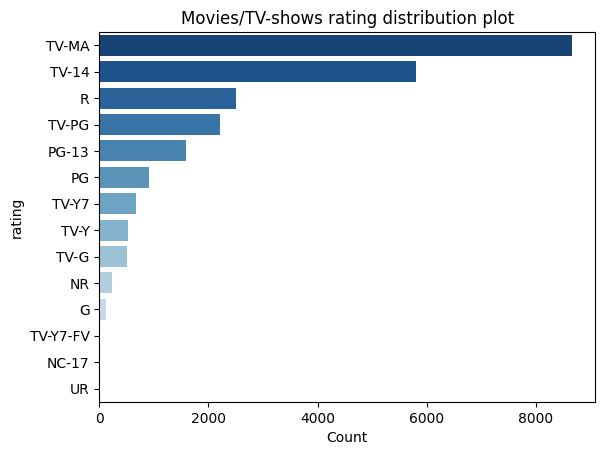

In [29]:
distribution_rating_plot = sns.countplot(data = df,
                                         y= "rating",
                                         order = df["rating"].value_counts().index,
                                         hue_order = df["rating"].value_counts().index,
                                         palette = "Blues_r",
                                         hue = "rating",
                                         legend = False)
plt.title("Movies/TV-shows rating distribution plot")
plt.xlabel("Count")
plt.ylabel("rating")
plt.show()



### 5.2. Proportion of Movies vs. TV Shows on Netflix :

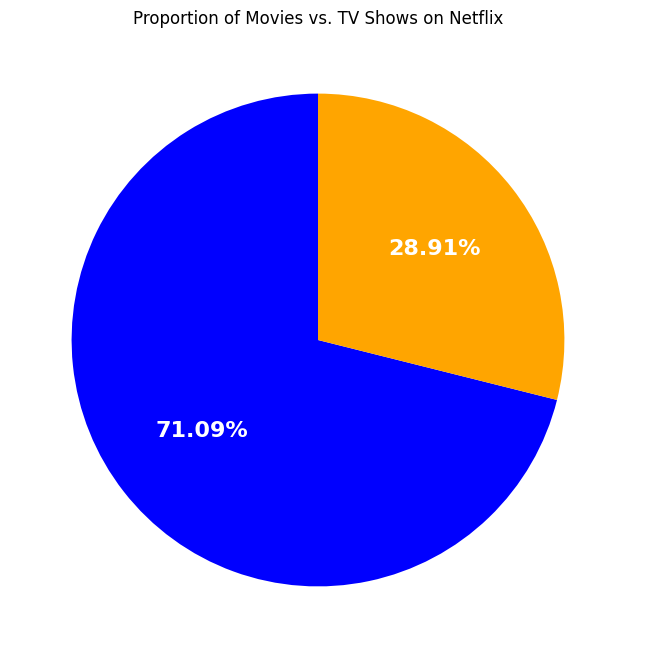

In [30]:
# 1. Count how many Movies and TV Shows there are
type_counts = df['type'].value_counts()

# 2. Plot the Pie Chart
plt.figure(figsize=(8, 8))

# autopct='%.2f%%' : calculates and displays the percentages inside the slices
plt.pie(
    type_counts, 
    labels=type_counts.index, 
    autopct='%.2f%%', 
    colors=['blue', 'orange'], # Netflix Red and Black
    startangle=90, 
    textprops={'color': 'white', 'weight': 'bold', 'fontsize': 16} 
)

plt.title("Proportion of Movies vs. TV Shows on Netflix")
plt.show()

### 5.3. Number of items added each year (year_added ): 

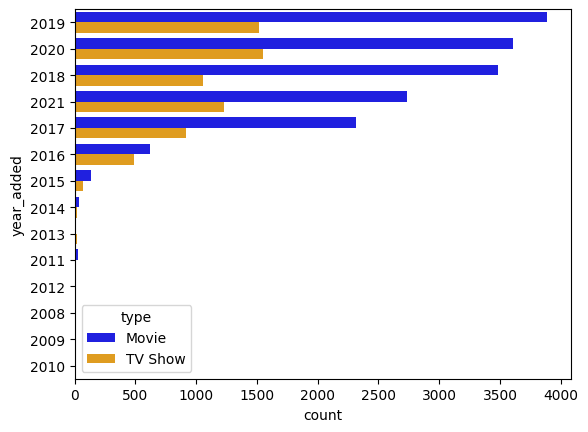

In [31]:
df["year_added"].unique()
#here I shoud make a chart with years and TVshows/movies added in each year barchart with 2 palletes for 

added_items_each_year_plot = sns.countplot(
    data = df,
    y = 'year_added',
    hue= "type",
    palette = ['blue', 'orange'],
    order = df["year_added"].value_counts().index

)
plt.show()

### 5.4. Evolution of the catalogue: films vs series by year: 

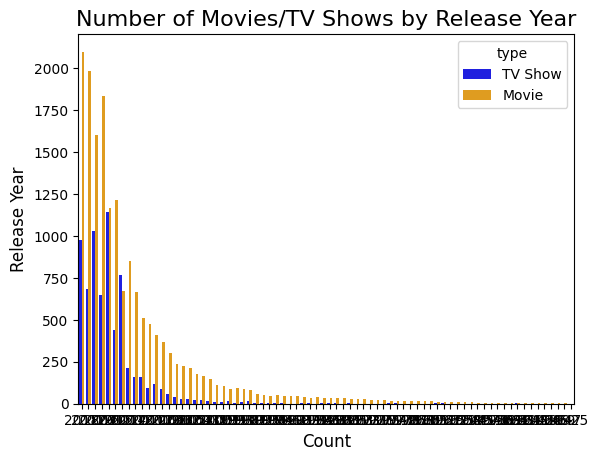

In [ ]:

evolution_by_year_plot = sns.countplot(
    data = df,
    x = 'release_year',
    hue= "type",
    palette = ['blue', 'orange'],
    order = df["release_year"].value_counts().index
)
plt.title("Number of Movies/TV Shows by Release Year", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Release Year", fontsize=12)
plt.show()

### 5.5. Evolution of the catalogue: films vs series by year: 

In [37]:

# 1. Count the number of Movies and TV Shows per release year
yearly_counts = df.groupby(['release_year', 'type']).size().reset_index(name='count')
yearly_counts

,release_year,type,count
0,1925,TV Show,1
1,1942,Movie,4
2,1943,Movie,4
3,1944,Movie,8
4,1945,Movie,6
...,...,...,...
114,2019,TV Show,1029
115,2020,Movie,1168
116,2020,TV Show,1142
117,2021,Movie,673


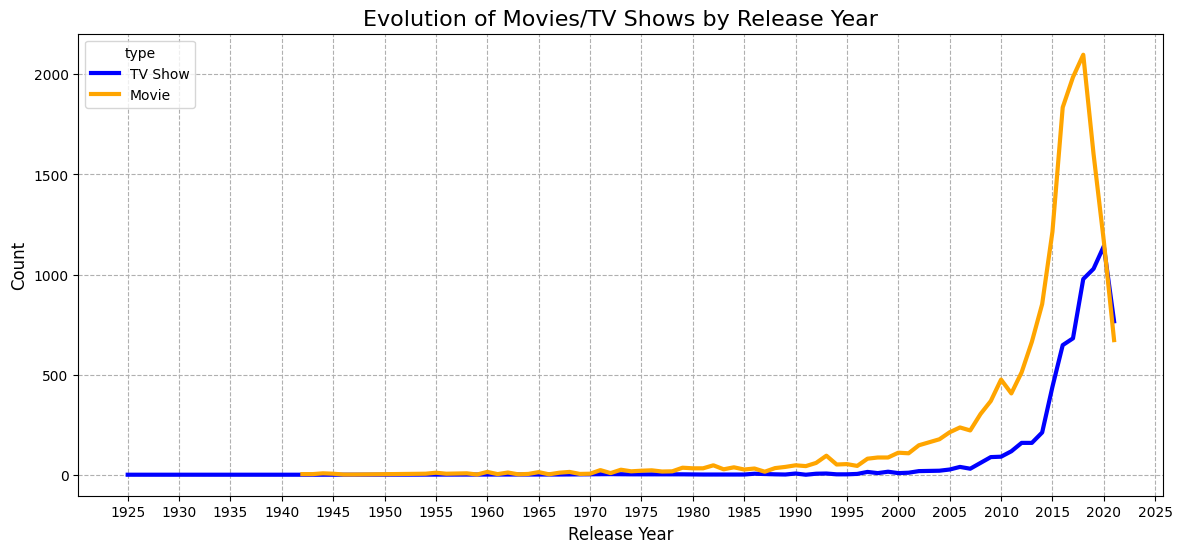

In [ ]:
#Plot size :
plt.figure(figsize=(14, 6))

#Line chart :
evolution_by_year_plot = sns.lineplot(
    data = yearly_counts,
    x = 'release_year',
    y = 'count',
    hue = "type",
    palette = ['blue', 'orange'],
    linewidth = 3 
)

#plot dimensions 
plt.title("Evolution of Movies/TV Shows by Release Year", fontsize=16)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Count", fontsize=12)

# X-axis to only show every 5 years
min_year = int(df['release_year'].min())
max_year = int(df['release_year'].max())
plt.xticks(np.arange(min_year, max_year + 5, 5)) 

# subtle grid to make it easier to read
plt.grid(True, linestyle='--', alpha=1)

plt.show()


### 5.6. Number of series from 2011 to 2021 :

The total number of TV Shows (series) from 2011 to 2021 is: 6336 TV Show


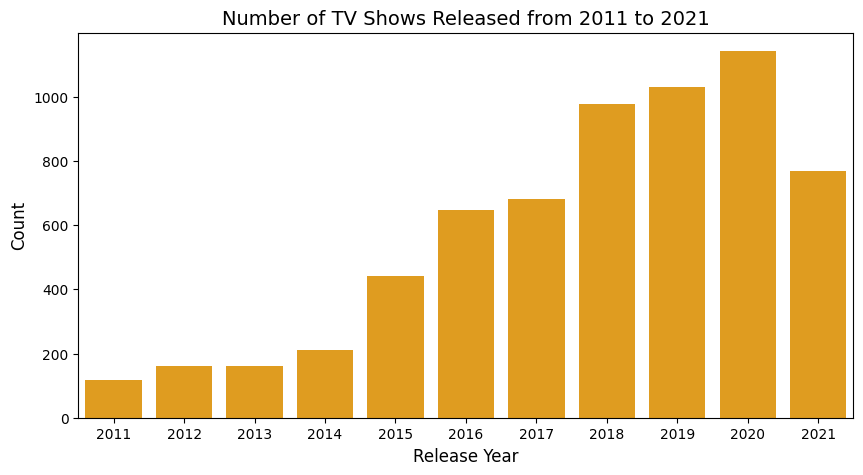

In [ ]:
# 1. Filter the data for only TV Shows between 2011 and 2021
series_11_to_21 = df[(df['type'] == 'TV Show') & 
                     (df['release_year'] >= 2011) & 
                     (df['release_year'] <= 2021)]

# 2. Get the total value and print it
total_series = len(series_11_to_21)
print(f"The total number of TV Shows (series) from 2011 to 2021 is: {total_series} TV Show")

# 3. Create a chart to show the trend
plt.figure(figsize=(10, 5))
sns.countplot(
    data=series_11_to_21, 
    x='release_year', 
    color='orange' 
)

plt.title("Number of TV Shows Released from 2011 to 2021", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()


### 5.7. Number of productions per country :

Top 10 Countries by Number of Productions:
country
United States     6764
India             2804
United Kingdom    1776
Unknown           1721
France             916
Canada             877
Japan              731
South Korea        632
Spain              591
Germany            511
Name: count, dtype: Int64
----------------------------------------


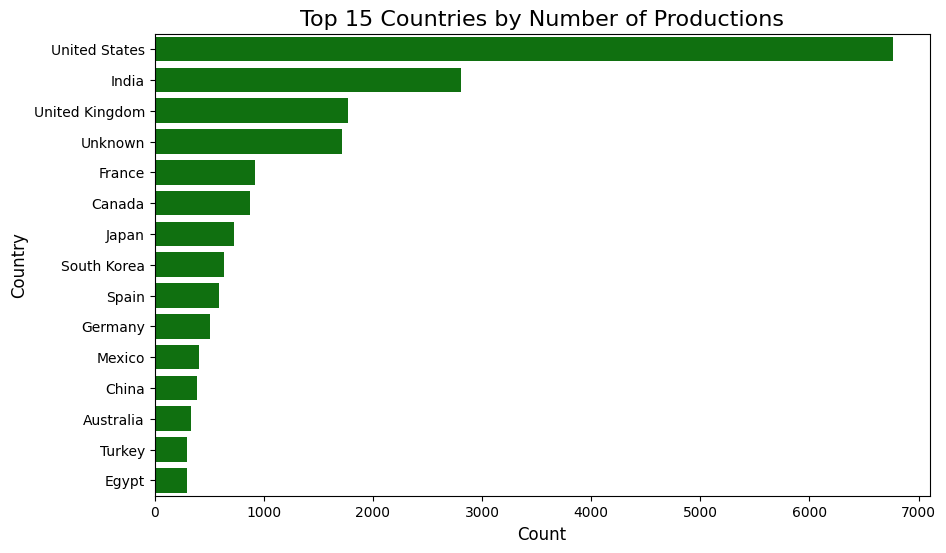

In [56]:
# Count the number of productions per country
country_counts = df['country'].value_counts()

# Print the top 10 to the screen
print("Top 10 Countries by Number of Productions:")
print(country_counts.head(10))
print("-" * 40) 

# Draw a horizontal bar chart for the Top 15 countries using barplot
plt.figure(figsize=(10, 6))

# top 15
top_15_countries = country_counts.head(15)


sns.barplot(
    x=top_15_countries.values, 
    y=top_15_countries.index,
    color='green'
)

plt.title("Top 15 Countries by Number of Productions", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Country", fontsize=12)

plt.show()


### 5.8. Number of productions by age classification :

Top 10 rating of productions :
rating
TV-MA    8653
TV-14    5797
R        2499
TV-PG    2205
PG-13    1584
PG        904
TV-Y7     673
TV-Y      521
TV-G      500
NR        235
Name: count, dtype: Int64
----------------------------------------


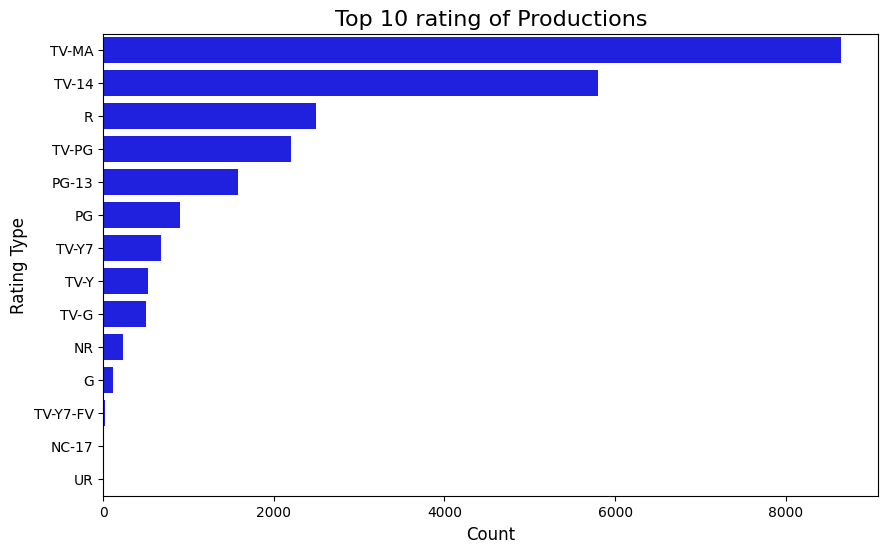

In [ ]:
# Count the number of productions by age classification
rating_counts = df[df['rating'] & df['show_id']].value_counts()

# Print the top 10 to the screen
print("Top 10 rating of productions :")
print(rating_counts.head(10))
print("-" * 40) 

# Draw a horizontal bar chart 
plt.figure(figsize=(10, 6))

# top 15
top_15_rating = rating_counts.head(15)

sns.barplot(
    x=top_15_rating.values, 
    y=top_15_rating.index,
    color='blue'
)

plt.title("Top 10 rating of Productions", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Rating Type", fontsize=12)

plt.show()

### 5.9. Genre analysis (listed _in) :